# 🚧 In Early Development

# Chicago Crimes (2001 to Present)
A CO³ Labs study by Christian Olivares-Rodriguez

The following data is directly from the City of Chicago with the latest update at the time of this project being 9/1/25



The dataset can be found in the following link: https://data.cityofchicago.org/d/ijzp-q8t2

## 📊 Dataset Features

The dataset contains **22 features**:

- **ID**: Unique identifier for the record.  
- **Case Number**: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.  
- **Date**: Date when the incident occurred (sometimes a best estimate).  
- **Block**: The partially redacted address where the incident occurred, placing it on the same block as the actual address.  
- **IUCR**: The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description.  
  - 🔗 [List of IUCR codes](https://data.cityofchicago.org/d/c7ck-438e)  
- **Primary Type**: The primary description of the IUCR code.  
- **Description**: The secondary description of the IUCR code, a subcategory of the primary description.  
- **Location Description**: Description of the location where the incident occurred.  
- **Arrest**: Indicates whether an arrest was made.  
- **Domestic**: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.  
- **Beat**: The beat where the incident occurred. A beat is the smallest police geographic area, each with a dedicated police beat car.  
  - 🔗 [See Chicago beats](https://data.cityofchicago.org/d/aerh-rz74)  
- **District**: Indicates the police district where the incident occurred.  
  - 🔗 [See Chicago districts](https://data.cityofchicago.org/d/fthy-xz3r)  
- **Ward**: The ward (City Council district) where the incident occurred.  
  - 🔗 [See Chicago wards](https://data.cityofchicago.org/d/sp34-6z76)  
- **Community Area**: Indicates the community area where the incident occurred. Chicago has 77 community areas.  
  - 🔗 [See community areas](https://data.cityofchicago.org/d/cauq-8yn6)  
- **FBI Code**: Crime classification per the FBI's NIBRS system.  
  - 🔗 [FBI crime classifications](https://gis.chicagopolice.org/pages/crime_details)  
- **X Coordinate**: The X coordinate of the location (State Plane Illinois East NAD 1983). Slightly shifted for privacy.  
- **Y Coordinate**: The Y coordinate of the location (State Plane Illinois East NAD 1983). Slightly shifted for privacy.  
- **Year**: Year the incident occurred.  
- **Updated On**: Date and time the record was last updated.  
- **Latitude**: The latitude of the incident location (shifted for privacy).  
- **Longitude**: The longitude of the incident location (shifted for privacy).  
- **Location**: Combined latitude/longitude format for mapping and geographic operations.  

This project will consist of two main phases, **Analysis (Phase 1)** and **Machine learning predictions with Pytorch (Phase 2)**

<p align = "center"> 
     <a href="https://pandas.pydata.org/" target="_blank" rel="noreferrer">
        <img src="https://pandas.pydata.org/static/img/pandas_mark.svg" alt="pandas" width="40" height="40"/>
    </a>
    <a href = "https://pytorch.org/" target="_blank" rel="noreferrer">
        <img src="https://www.vectorlogo.zone/logos/pytorch/pytorch-icon.svg" alt="pytorch" width="40" height="40"/>
    </a>
</p>

# Libraries

---

### Library Checker

The following code checks if your environment has the libraries that are needed for this project. 
- If a library is already installed, it confirms with a checkmark.  
- If a library is missing, it will automatically install it using `pip`. 


In [9]:
import importlib
import subprocess
import sys

library_map = {
    "pandas" : "pandas",
    "plotly.express": "plotly",
    "torch": "torch",
    "IPython.display": "ipython",
    "matplotlib.pyplot": "matplotlib",
    "nbformat": "nbformat"
}

for import_name, pip_name in library_map.items():
    try:
        importlib.import_module(import_name)
        print(f"✅ {import_name} is installed")
    except ImportError:
        print(f"📦 Installing {pip_name} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name])
        print(f"✅{pip_name} installed successfully")

        

✅ pandas is installed
✅ plotly.express is installed
✅ torch is installed
✅ IPython.display is installed
✅ matplotlib.pyplot is installed
✅ nbformat is installed


### Importing the data

In [ ]:
import pandas as pd
import plotly.express as px
import torch 
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

# Importing the Data

---

In [11]:

size = input("Please choose which CSV size, (small or large):")
home = Path.home()
print("Home directory:", home)

data_path = home / "Data Sci" / "Projects" / "Python" / "Chicago Crimes" / "CSV"

if size.lower() == "large":
    csv_file = data_path / "Crimes_-_2001_to_Present_20250901.csv"
    print("⚠️ Loading LARGE dataset (8M+ rows) ... this is going to take bit")
else:
    csv_file = data_path / "Random_Smaller_Sample_of_Crimes_-_2001_to_Present.csv"
    print("✅ Loading SMALL dataset (recommended for ploting and prototyping)")

print("Loading:" ,csv_file)

crime_df = pd.read_csv(csv_file)

display(crime_df.head(5))
print(crime_df.shape)
crime_df.isnull().sum()

Home directory: /Users/christianolivares
✅ Loading SMALL dataset (recommended for ploting and prototyping)
Loading: /Users/christianolivares/Data Sci/Projects/Python/Chicago Crimes/CSV/Random_Smaller_Sample_of_Crimes_-_2001_to_Present.csv


ID Case Number                    Date                Block  IUCR  \
0   2286773    HH570762  08/03/2002 12:00:00 AM      005XX E 33RD PL  0841   
1   4719568    HM326182  05/02/2006 02:00:00 PM    002XX W NORTH AVE  0820   
2   3960491    HL328508  05/01/2005 03:53:13 AM  087XX S PRAIRIE AVE  0486   
3  13316452    JG551495  12/22/2023 11:43:00 PM    057XX S MORGAN ST  0325   
4   5851726    HN654073  10/17/2007 06:10:00 PM  104XX S CORLISS AVE  0496   

  Primary Type                                      Description  \
0        THEFT                   FINANCIAL ID THEFT:$300 &UNDER   
1        THEFT                                   $500 AND UNDER   
2      BATTERY                          DOMESTIC BATTERY SIMPLE   
3      ROBBERY                              VEHICULAR HIJACKING   
4      BATTERY  AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False     False  ...   4.0            35.0        06   
1               STREET   False     False  ...  43.0             7.0        06   
2            RESIDENCE   False      True  ...   6.0            44.0       08B   
3               STREET   False      True  ...  16.0            68.0        03   
4            APARTMENT    True      True  ...   9.0            50.0       04B   

   X Coordinate Y Coordinate  Year              Updated On   Latitude  \
0     1180708.0    1882808.0  2002  02/28/2018 03:56:25 PM  41.833681   
1     1174046.0    1910984.0  2006  02/10/2018 03:50:01 PM  41.911149   
2     1179560.0    1847148.0  2005  02/28/2018 03:56:25 PM  41.735853   
3     1170624.0    1866771.0  2023  12/21/2024 03:40:46 PM  41.789900   
4     1183418.0    1836050.0  2007  09/07/2021 03:41:02 PM  41.705310   

   Longitude                       Location  
0 -87.612440   (41.83368122, -87.612439993)  
1 -87.636044  (41.911148844, -87.636044272)  
2 -87.617741   (41.73585309, -87.617741156)  
3 -87.649908  (41.789900308, -87.649908101)  
4 -87.603951  (41.705309959, -87.603951477)  

[5 rows x 22 columns]

(209784, 22)


ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      363
Arrest                      0
Domestic                    0
Beat                        0
District                    3
Ward                    15309
Community Area          15283
FBI Code                    0
X Coordinate             2387
Y Coordinate             2387
Year                        0
Updated On                  0
Latitude                 2387
Longitude                2387
Location                 2387
dtype: int64

#### (Optional) How the smaller CSV was created
Code used to create the smaller version of the original CSV. It randomly grabs 2.5 percent of the rows from the CSV and saves it on the computer's storage.

In [12]:
# crime_df = pd.read_csv('/Users/christianolivares/Data Sci/Projects/Python/Chicago Crimes/CSV/Crimes_-_2001_to_Present_20250901.csv')
# crime_df = crime_df.sample(frac = 0.025, random_state = 42)
# crime_df.to_csv("/Users/christianolivares/Data Sci/Projects/Python/Chicago Crimes/CSV/Random_Smaller_Sample_of_Crimes_-_2001_to_Present.csv", index = False)

# Making a Copy and Filtering the Data

---

In [13]:
# Copy df
crime_copy_df = crime_df.copy()

# Drop NAs, check shape, and check for any NAs
crime_clean_df = crime_copy_df.dropna()
print(crime_clean_df.shape)
print(crime_clean_df.isnull().sum())

(192082, 22)
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


After cleaning we went from 209,784 rows down to 192,082

# Phase 1

---

### Analysis

Let's first start off by checking all the column names and the unique crimes fromt the column Primary Type along with the amount of times they appear in the dataset

In [14]:
column_names = list(crime_clean_df.columns)

unique_primary_type = crime_clean_df['Primary Type'].unique()

print("Column Names:")
display(column_names)

print("Unique Primary Types:")
display(unique_primary_type)

crime_clean_df['Primary Type'].value_counts()

Column Names:


['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

Unique Primary Types:


array(['THEFT', 'BATTERY', 'ROBBERY', 'DECEPTIVE PRACTICE',
       'OTHER OFFENSE', 'NARCOTICS', 'CRIMINAL DAMAGE', 'ASSAULT',
       'BURGLARY', 'ARSON', 'MOTOR VEHICLE THEFT', 'INTIMIDATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL TRESPASS',
       'PROSTITUTION', 'WEAPONS VIOLATION', 'SEX OFFENSE',
       'CRIM SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN',
       'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'PUBLIC PEACE VIOLATION',
       'CRIMINAL SEXUAL ASSAULT', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'STALKING',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'OBSCENITY',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

Primary Type
THEFT                                40990
BATTERY                              35181
CRIMINAL DAMAGE                      21863
NARCOTICS                            17118
ASSAULT                              13024
OTHER OFFENSE                        12118
BURGLARY                             10281
MOTOR VEHICLE THEFT                   9857
DECEPTIVE PRACTICE                    8417
ROBBERY                               7143
CRIMINAL TRESPASS                     5220
WEAPONS VIOLATION                     2903
PROSTITUTION                          1470
OFFENSE INVOLVING CHILDREN            1337
PUBLIC PEACE VIOLATION                1253
SEX OFFENSE                            714
CRIM SEXUAL ASSAULT                    594
INTERFERENCE WITH PUBLIC OFFICER       536
ARSON                                  354
HOMICIDE                               334
LIQUOR LAW VIOLATION                   323
GAMBLING                               321
CRIMINAL SEXUAL ASSAULT                24

In [15]:
crime_clean_df = crime_clean_df.rename(columns = {"Primary Type" : "Crime"})
column_names = list(crime_clean_df.columns)

display(column_names)

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Crime',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [16]:
# group the amount of times a certain crime occured per year
crime_counts = crime_clean_df.groupby(["Year", "Crime"]).size().reset_index(name = "Count")

<Axes: title={'center': 'Crimes by Type in 2025'}, xlabel='Crime'>

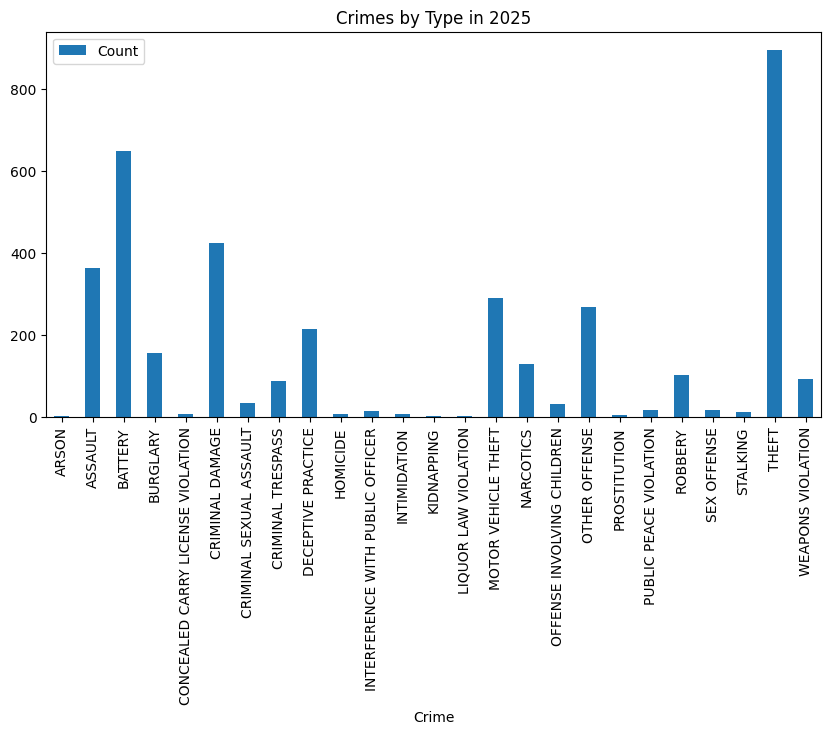

In [17]:
# crime_clean_df.plot(x = "Year", y = "Primary Type", kind = "bar", title = "Crimes per Year")
crime_counts[crime_counts["Year"] == 2025].plot(
    x = "Crime", y = "Count",kind = "bar", figsize = (10,5),
    title = "Crimes by Type in 2025"
)

# Interactive Scatter Map 

The following scatter map is interactable and allows you to filter by crimes

In [18]:
fig = px.scatter_map(
    crime_clean_df,
    lat = "Latitude",
    lon = "Longitude",
    color = "Crime",               
    map_style = "open-street-map",
    zoom = 8,
    title="Chicago Crimes by Location"
)

fig.update_layout(showlegend = True)  


hide_all = ["legendonly"] * len(fig.data)   
show_all = [True] * len(fig.data)           

fig.update_layout(
    updatemenus = [
        {
            "type": "buttons",
            "direction": "left",
            "x": 0.70, "y": 1.15,
            "buttons": [
                {
                    "label": "Hide All Crimes",
                    "method": "update",
                    "args": [{"visible": hide_all}, {}]
                },
                {
                    "label": "Show All Crimes",
                    "method": "update",
                    "args": [{"visible": show_all}, {}]
                }
            ]
        }
    ]
)

fig.show()

# Scatterplot

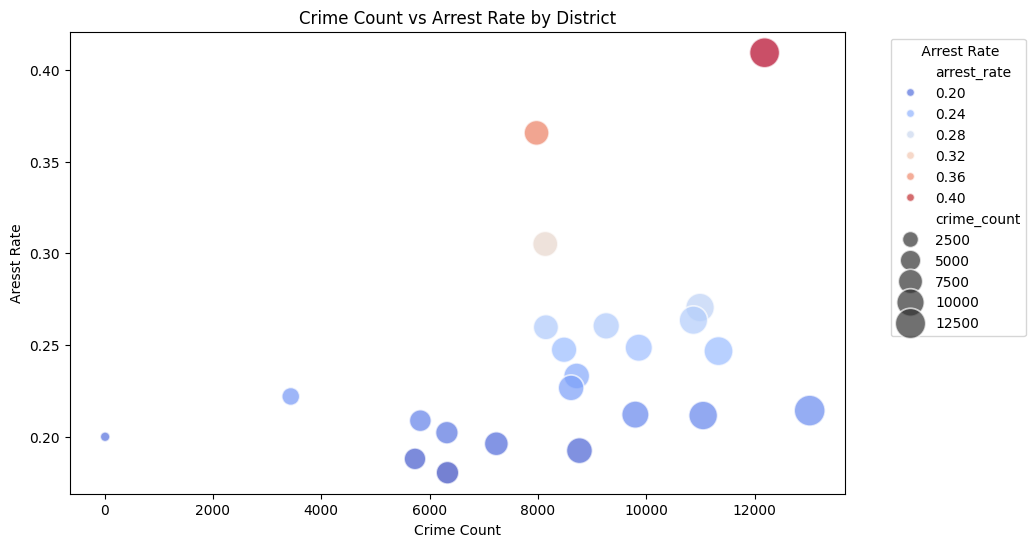

In [19]:
import seaborn as sns

district_stats = (
    crime_clean_df.groupby("District")
        .agg(crime_count=("Crime", "count"),
            arrest_rate =("Arrest", "mean"))
        .reset_index()
)

plt.figure(figsize = (10,6))
sns.scatterplot(
    data = district_stats,
    x = "crime_count",
    y = "arrest_rate",
    size = "crime_count",
    hue = "arrest_rate",
    palette = "coolwarm",
    sizes = (50,500),
    alpha = 0.7 
)

plt.title("Crime Count vs Arrest Rate by District")
plt.xlabel("Crime Count")
plt.ylabel("Aresst Rate")
plt.legend(title = " Arrest Rate", bbox_to_anchor=(1.05, 1), loc = "upper left")
plt.show()


# Heat Map

In [ ]:
# Make a grid over Chicago
lat_bins = np.linspace(41.60, 42.10, 80)
lon_bins = np.linspace(-87.95, -87.40, 80)

geo = crime_clean_df[['Latitude','Longitude']].dropna()
geo = geo[(geo['Latitude'].between(lat_bins.min(), lat_bins.max())) & 
          (geo['Longitude'].between(lon_bins.min(), lon_bins.max()))]

# Count incidents per cell
geo['lat_bin'] = pd.cut(geo['Latitude'], bins=lat_bins, include_lowest=True)
geo['lon_bin'] = pd.cut(geo['Longitude'], bins=lon_bins, include_lowest=True)
cell_counts = geo.groupby(['lat_bin','lon_bin']).size().rename('count').reset_index()

# Convert bins to centers for plotting
def mid(x): 
    left, right = float(x.left), float(x.right)
    return (left + right)/2

cell_counts['lat_c'] = cell_counts['lat_bin'].apply(mid)
cell_counts['lon_c'] = cell_counts['lon_bin'].apply(mid)

# Normalize counts (z-score) as a crude hotspot score
cell_counts['z'] = (cell_counts['count'] - cell_counts['count'].mean()) / (cell_counts['count'].std() + 1e-6)

# Circle markers sized by hotspot intensity
m_hot = folium.Map(location=[41.8781, -87.6298], zoom_start=11, tiles='cartodbpositron')
for _, r in cell_counts.iterrows():
    if r['count'] == 0: 
        continue
    folium.CircleMarker(
        [r['lat_c'], r['lon_c']],
        radius=max(2, min(10, 2 + 3*r['z'])),  
        color=None, fill=True, fill_opacity=0.6,
        popup=f"Incidents: {int(r['count'])}, z={r['z']:.2f}"
    ).add_to(m_hot)

m_hot.save('chicago_hotspots_grid.html')
m_hot

/var/folders/y3/mm5wlxss6vn45zrg4391h4h00000gn/T/ipykernel_93582/1632700088.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Phase 2

---
### Machine Learning Predictions with PyTorch 
<a href="https://pytorch.org/" target="_blank" rel="noreferrer">
  <img src="https://www.vectorlogo.zone/logos/pytorch/pytorch-icon.svg" alt="PyTorch" width="30" height="30" style="vertical-align:middle; margin-left:8px"/>
</a>